In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import jieba

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import networkx as nx

In [4]:
fname = '/python/datasource/sqlResult_1558435.csv'

news = pd.read_csv(fname, encoding = 'gb18030')
len(news)

In [6]:
news.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [7]:
news_text = news['content']

#### 切词

In [8]:
cut_text_file = '/python/datasource/project/news_cut.txt'

In [10]:
fileNews = open(cut_text_file,'w', encoding = 'utf8')
for rs in news_text:
    if not rs[3]: continue
    news = rs[3].strip()
    if not news: continue
    text = "".join(re.findall(r'[^\\n\r\n\u3000]',news))
    text = "".join(re.findall(r'[\d|\w]+',text))#数据清洗
#     text = langconv.Converter('zh-hans').convert(text)#繁简转换
    cut_text = list(jieba.cut(text))#切词	
    fileNews.write(" ".join(cut_text) + '\n')
fileNews.close()    
conn.close()
return True

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.040 seconds.
Prefix dict has been built succesfully.


TypeError: 'float' object is not subscriptable

In [11]:
choose_index = np.random.choice(range(len(news_text)), size=200)
print(choose_index, end=' ')

[31577 88420 34007 48833 41291 80479 57554 40088 30003 34765 23905 23644
 52882 70247 36546 87846 56416 32305 78447 30400 61200 11444 51035 45862
 66031  8733 10805 48369 47148  3380 87838 14835 47337 38893 25908 55616
 55494 16728 75488 84674 38337 46710 63260 84481 65985 62817 21626 29096
 23919 57715 51952 80679 68936 21778 44544 26959 26459 56960 56639 66368
 81353 22848 33167 58794 10897 49211 53922 36485 66247 55682 77538 67282
  2934 79440 48234 87765  8431 30016 82128 33260 68753  4666 29852 55131
 84045 46546 87765 88641 22838 50167 63860 15981 44821 49067 14641 41924
 59290 37624 68372 73459 80511 45259 57826 42148 14794 24526 31350  3609
 33144 67304 52965 16123 32647  3415 60867 40445 75665 50955 38991 14668
 12415 71087 48795 44775 10287 12496 32747 63557 38036 30547 29104 54494
 24098 55532 87004 40390   142 67159  1840 36726  3867 53127 20029 48123
 81295 44158 18541 81685 84717 88756 38308 83200 79198 50008 63920 51120
 47118 67266  7080  4972 38179 89435 76457 63421 53

In [12]:
text = [news_text[t] for t in choose_index]
len(text)

200

In [13]:
text_clean = []
for t in text:
    news = str(t).strip()
    if not news: continue
    t = "".join(re.findall(r'[^\\n\r\n\u3000]',news))
    text_clean.append(t)
len(text_clean)
text_clean

['新华社照片，犍为县（四川），2017年4月17日春天，小火车与桐子花有个约会4月17日，一辆火车经过桐子花丛。近日，四川嘉阳小火车沿途的桐子花盛开，当小火车穿越桐子花丛，鸣笛喷气，场面宛如画卷一般。在四川省犍为县，目前依然运行着老式窄轨蒸汽火车——嘉阳小火车，它保留了上世纪蒸汽时代最原始的加煤、制动、扳道等手动操作方式，已有半个世纪的运行历史。2006年4月，嘉阳小火车被政府以工业遗产的形式命名为文物单位来保护后，当地发掘文化和旅游资源，探索煤炭附属产业、旅游业等业态共同发展的道路。新华社记者江宏景摄',
 '新华社照片，外代，2017年6月6日（外代二线）夏天来了6月5日，在印度新德里，人们领取免费冷饮。新华社/美联',
 '新华社大马士革４月１９日电（记者车宏亮）叙利亚首都大马士革西北郊最后一批反政府武装人员１９日完成撤离，标志着叙政府全面控制大马士革西郊地区。叙军方消息人士告诉新华社记者，大约５００名反政府武装人员及家属当天乘坐１１辆大巴从大马士革西北郊扎巴达尼镇撤离，前往反政府武装控制的西北部伊德利卜省。据叙通社报道，反政府武装人员撤离前在镇中放火，同时引爆其弹药库。根据叙政府军与反政府武装先前达成的协议，２３００多名反政府武装人员及其家属１４日开始从大马士革西北郊撤离。与此同时，被反政府武装围困的伊德利卜省什叶派小镇卡夫拉亚和福阿的居民也分批撤离。目前反政府武装主要集中在大马士革东郊。（完）',
 '新华社照片，合肥，2017年5月3日青春在大别山脱贫攻坚一线绽放张传峰在竹畈村与自己的羊合影（4月26日摄）。今年33岁的张传峰家住金寨县汤家汇镇竹畈村。2015年他向亲戚借钱，建了简单的羊舍，买了几十只羊和100只鸡苗，从事养殖业。当地政府向张传峰这样因病致贫的贫困户提供无息贷款，并给予养殖技术指导。2016年他的美羊羊家庭农场毛收入10万元，成功脱贫。安徽省岳西县和金寨县是位于大别山集中连片特困地区的贫困县。日前，记者来到岳西县和金寨县脱贫攻坚一线，用镜头记录几名驻村扶贫干部、创业致富带头人、脱贫户在大别山里的脱贫故事。新华社记者张端摄',
 '新华社照片，外代，2017年4月26日（外代二线）纽约婚纱时装周——IesDiSato品牌婚纱秀4月21日，在美国纽约婚纱时装周上，模特展示IesDiSato品牌的婚纱作品。新华社/美联',
 '新华社照片，巴

In [21]:
paragraph = random.choice(text_clean)
sentences = re.split('。|！|\!|\.|？|\?',paragraph)
new_sents = []
for i in range(int(len(sentences)/2)):
    sent = sentences[2*i] + sentences[2*i+1]
    new_sents.append(sent)
new_sents

['新华社香港４月１６日电（记者刘宁）随着中国香港名将李慧诗１６日冲金梦碎——无缘女子凯林赛决赛，２０１７年场地自行车世界锦标赛在香港将军澳自行车馆落幕，女子争先赛夺铜的李慧诗为中国香港队获得本届赛事唯一一枚奖牌女子凯林赛中，李慧诗首轮位列小组第一直接晋级',
 '第二轮，李慧诗在倒数第二圈时为了躲避前方摔车的韩国选手李慧津，不得不减速，最终仅排名第五，无缘决赛在随后的７至１２名争夺战中，无心恋战的“牛下女车神”以第十名结束本届世锦赛之旅',
 '对于在主场冲金未果，李慧诗赛后难掩失望之情她说：“第一轮发挥很好，但第二轮却太紧张，提早发动攻势想要去避免碰撞，结果真的还是撞了，不得不减速',
 '如果不是有碰撞，我想我能进入决赛不过，这次确实发挥不是很理想',
 '我会好好总结，调整自己，重新再出发”德国选手沃格尔最终夺冠，哥伦比亚选手巴约娜和比利时选手德格恩德尔分获银、铜牌',
 '在当天进行的其他三个项目决赛中，英国车手贝克以４５分的总成绩夺得女子计分赛冠军，法国选手珀维斯在男子计时赛中称雄，法国队也夺得了男子麦迪逊赛冠军本次世锦赛为期５天，吸引了来自世界各地４２支队伍的３７０名选手参赛，共决出了２０个项目的奖牌']

In [23]:
sents = new_sents

In [24]:
word2vec_file = '/python/datasource/project/news.word2vec'

In [25]:
model = Word2Vec.load(word2vec_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [26]:
print(model.wv.vocab['好'])

Vocab(count:11657, index:142, sample_int:4294967296)


In [18]:
cut_sents = []
for s in sents:
    sent = []
    cut_text = jieba.cut(s)
    for t in cut_text:
        t = "".join(re.findall(r'[\d|\w]+',t))
        t = t.strip()
        if not t: continue
        sent.append(t)
    cut_sents.append(sent)
len(cut_sents)

1

In [19]:
model.wv.get_vector('你好')

array([ 0.01428604,  0.03042996, -0.1263863 ,  0.08495369,  0.07958865,
       -0.08631614, -0.16039635,  0.3372984 , -0.06757958, -0.41452414,
       -0.12893516,  0.20643152,  0.06735481,  0.00367164, -0.01455336,
       -0.28374642,  0.00100876,  0.27156764, -0.46175545,  0.0150556 ,
        0.11571993, -0.01497004,  0.07515483, -0.03009157, -0.01299395,
       -0.06345439, -0.08435863, -0.1461114 , -0.15125369,  0.15911342,
        0.04390492,  0.0515627 , -0.29651564,  0.07409146,  0.38727042,
        0.32691947, -0.05341629, -0.08256913, -0.00724888, -0.04981751,
       -0.2703018 ,  0.11863319, -0.02667967,  0.24051885,  0.00240429,
        0.12185965,  0.02992186, -0.04001197,  0.26119286,  0.0041051 ,
        0.28593618,  0.03034174, -0.45548347,  0.1095953 ,  0.29069203,
        0.304009  ,  0.03753611, -0.11905676,  0.05151998,  0.06867304,
       -0.15202512,  0.16764647,  0.2487268 , -0.08473852, -0.07993683,
       -0.08039192, -0.15352635,  0.13566929,  0.14501147, -0.27

In [20]:
len(model.wv.vocab)

99366

#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

In [26]:
sents_vec = []
for s in cut_sents:
    sent_vec = sum(model.wv.get_vector(w)  for w in s if w in model.wv.vocab)/sum(1 for w in s if w in model.wv.vocab)
#     sent_len = sum(1 for w in s if w in model.wv.vocab)
#     print(len(s), sent_len)
#     print(sent_vec.shape)
    sents_vec.append(sent_vec)
#     sent_vec = 0
len(sents_vec)

1

In [24]:
# from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
sents_vec[0].reshape(1,-1)

IndexError: list index out of range

In [111]:
def cos_sim(vec1, vec2):
    return cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]

In [112]:
sim = cos_sim(sents_vec[0], sents_vec[1])
sim

0.3476851

In [142]:
sim_mat = np.zeros([len(sents_vec), len(sents_vec)])
for i in range(len(sents_vec)):
    for j in range(len(sents_vec)):
        if i == j: 
            sim_mat[i][j] = 0.0
        else:
            sim_mat[i][j] = cos_sim(sents_vec[i], sents_vec[j])

In [143]:
nx_graph = nx.from_numpy_array(sim_mat)

In [144]:
scores = nx.pagerank(nx_graph)

In [166]:
rank_sents = [new_sents[i] for i in sorted(sorted(scores, key = lambda x: scores[x], reverse=True)[:4])]

In [167]:
rank_sents

['自海上丝绸之路逐渐成形以来，中国的古人就通过航海活动与苏禄人建立起贸易联系据菲律宾史学家格雷戈里奥·F·赛义德著述，在中菲两国人民长期友好交流中，“菲律宾人从中国人那里学会了使用瓷器、雨伞、锣和一些别的金属制品……早期菲律宾人穿的宽大衣服、有袖子的上衣……都透露了中国人的影响”',
 '历史上，在沙巴东侧，有苏禄王访华，而在沙巴西侧，另一个古国渤泥国的国王也曾沿着海上丝路谱写过元首外交的诗篇盛世华章，继往开来今天的文莱，古时叫做渤泥，其疆域曾达到加里曼丹岛的大部分地区',
 '这些载入史册的元首外交，它们留下的不仅是外交佳话，更是超越地缘的政治智慧在王守栋教授看来，几百年前那些不辞万里艰辛而相逢的元首外交展现的是一曲曲中外友好交流的“盛世华章”',
 '中国的‘亲、诚、惠、容’周边外交理念更是让历史与现实不期而遇，融为一体”苏禄王来华600年后的今天，在菲律宾马尼拉港，3艘仿古木船已经升起风帆，准备沿着那条海上丝路，北上中国，重温当年那场元首外交，重返最初相逢的地方']

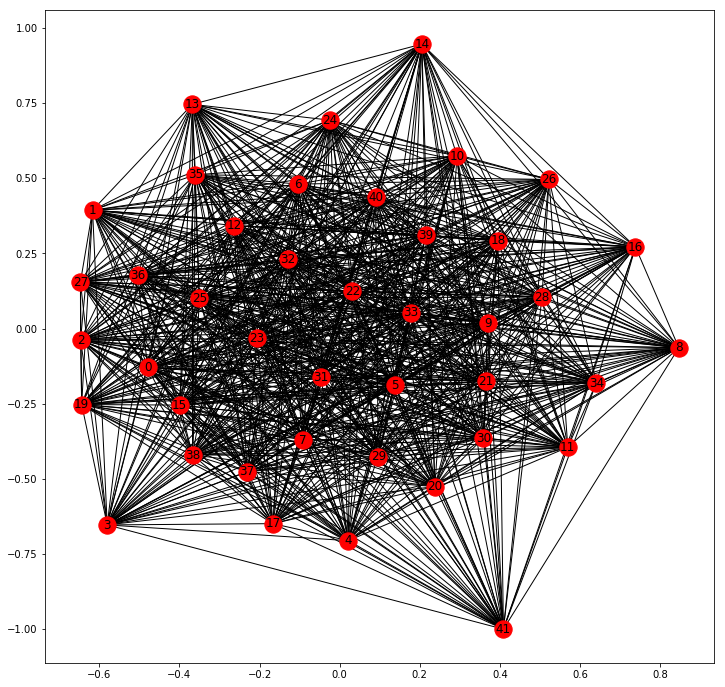

In [164]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(nx_graph)

In [161]:
scores

{0: 0.022510614500984513,
 1: 0.021053360409694136,
 2: 0.025636489764442962,
 3: 0.017806830917507586,
 4: 0.021213354299504,
 5: 0.026497681336483496,
 6: 0.026101239285716848,
 7: 0.023296734611704863,
 8: 0.017914390541704284,
 9: 0.027677874884358578,
 10: 0.023829408804387987,
 11: 0.020953381231656586,
 12: 0.02717922026461061,
 13: 0.018718705965879677,
 14: 0.015296270800788556,
 15: 0.02536487567589488,
 16: 0.01914404995509069,
 17: 0.022649545913676798,
 18: 0.024491889690671644,
 19: 0.024154801816508878,
 20: 0.027155378240552037,
 21: 0.025451601572369864,
 22: 0.027436972006975133,
 23: 0.024428926489199414,
 24: 0.021162959549529466,
 25: 0.02394498494311672,
 26: 0.02254452185492895,
 27: 0.02661252909891755,
 28: 0.026049492939273663,
 29: 0.02657599577125251,
 30: 0.026193660674829936,
 31: 0.026943075136125344,
 32: 0.02704803799138642,
 33: 0.02899120284283301,
 34: 0.021099057126504166,
 35: 0.02394088941648769,
 36: 0.022826806331936723,
 37: 0.02770149573603209

In [160]:
sorted(scores, key = lambda x: scores[x], reverse=True)

[33,
 40,
 37,
 9,
 22,
 12,
 20,
 39,
 32,
 31,
 27,
 29,
 5,
 30,
 6,
 28,
 38,
 2,
 21,
 15,
 18,
 23,
 19,
 25,
 35,
 10,
 7,
 36,
 17,
 26,
 0,
 4,
 24,
 34,
 1,
 11,
 16,
 13,
 8,
 3,
 14,
 41]

#### Task 2 使用PageRank 对文本进行关联分析

In [30]:
def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = nx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [31]:
words_graph = get_connect_graph_by_text_rank(" ".join(cut_sents[0]))

In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei']

C:\Users\wang.kui\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\wang.kui\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


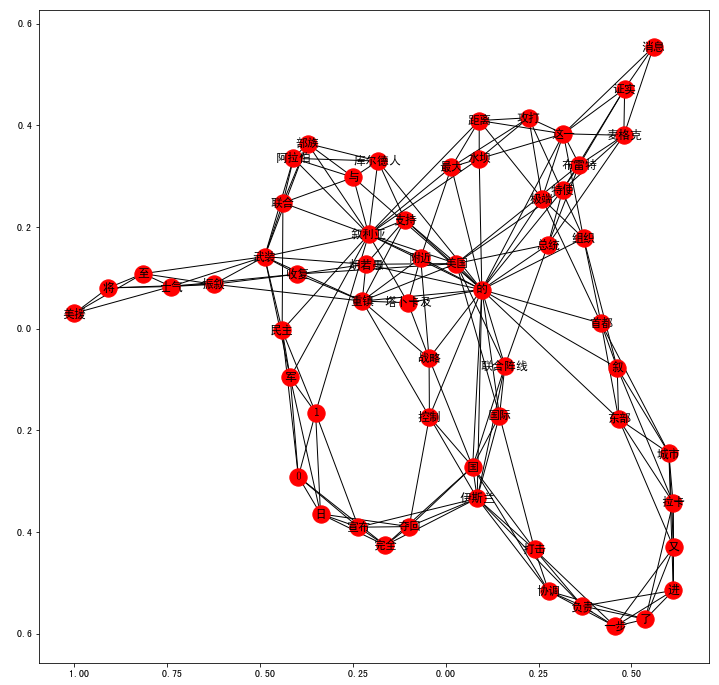

In [33]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(words_graph, font_size=12)

In [42]:
words_graph.edges()

EdgeView([('美援', '美援'), ('美援', '将'), ('美援', '至'), ('美援', '士气'), ('将', '将'), ('将', '至'), ('将', '士气'), ('将', '振叙'), ('至', '至'), ('至', '士气'), ('至', '振叙'), ('至', '武装'), ('士气', '士气'), ('士气', '振叙'), ('士气', '武装'), ('士气', '收复'), ('振叙', '振叙'), ('振叙', '武装'), ('振叙', '收复'), ('振叙', '重镇'), ('武装', '武装'), ('武装', '收复'), ('武装', '重镇'), ('武装', '胡若愚'), ('武装', '阿拉伯'), ('武装', '部族'), ('武装', '联合'), ('武装', '叙利亚'), ('武装', '民主'), ('武装', '军'), ('收复', '收复'), ('收复', '重镇'), ('收复', '胡若愚'), ('收复', '美国'), ('重镇', '重镇'), ('重镇', '胡若愚'), ('重镇', '美国'), ('重镇', '支持'), ('重镇', '控制'), ('重镇', '的'), ('重镇', '战略'), ('重镇', '塔卜卡及'), ('重镇', '附近'), ('胡若愚', '胡若愚'), ('胡若愚', '美国'), ('胡若愚', '支持'), ('胡若愚', '的'), ('美国', '美国'), ('美国', '支持'), ('美国', '的'), ('美国', '叙利亚'), ('美国', '国际'), ('美国', '联合阵线'), ('美国', '总统'), ('美国', '特使'), ('美国', '布雷特'), ('支持', '支持'), ('支持', '的'), ('支持', '叙利亚'), ('支持', '库尔德人'), ('的', '的'), ('的', '叙利亚'), ('的', '库尔德人'), ('的', '与'), ('的', '伊斯兰'), ('的', '国'), ('的', '控制'), ('的', '战略'), ('的', '塔卜卡及'), ('的', '附近'), ('的', '最大'), ('的

In [43]:
g_dic = {}
node_set = set()
for i, j in words_graph.edges():
    node_set.add(i)
    node_set.add(j)
    if i == j: continue
    if i not in g_dic : g_dic[i] = set()
    g_dic[i].add(j)

In [44]:
print(node_set)

{'民主', '收复', '士气', '东部', '胡若愚', '完全', '部族', '夺回', '美国', '叙', '支持', '布雷特', '负责', '最大', '距离', '协调', '总统', '战略', '国', '阿拉伯', '麦格克', '将', '控制', '伊斯兰', '美援', '重镇', '叙利亚', '军', '这一', '组织', '０', '的', '特使', '与', '１', '水坝', '又', '日', '附近', '武装', '塔卜卡及', '国际', '了', '宣布', '极端', '首都', '证实', '至', '城市', '库尔德人', '攻打', '联合阵线', '消息', '进', '振叙', '一步', '拉卡', '打击', '联合'}


In [38]:
node_mat = np.zeros((len(node_set), len(node_set)))
for i, w1 in enumerate(g_dic):
    p = 1/len(g_dic[w1])
    for j, w2 in enumerate(g_dic[w1]):
        node_mat[j][i] = p
node_mat

array([[0.33333333, 0.33333333, 0.33333333, ..., 0.5       , 1.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
d = 0.85
pr = np.ones((len(node_set), 1)) 
for i in range(10):
    print(pr.T)
    pr = 1/len(node_set) * (1-d) + d * np.dot(node_mat,pr)
print('\n',pr.T)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[2.16451095e+01 1.31451095e+01 1.01701095e+01 8.20109528e-01
  8.20109528e-01 8.20109528e-01 5.36776195e-01 4.15347623e-01
  2.02847623e-01 1.08403179e-01 1.08403179e-01 1.08403179e-01
  1.08403179e-01 4.30185634e-02 4.30185634e-02 4.30185634e-02
  4.30185634e-02 4.30185634e-02 4.30185634e-02 4.30185634e-02
  4.30185634e-02 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237288e-03 2.54237288e-03 2.54237288e-03 2.54237288e-03
  2.54237

In [4]:
nx.Graph?

### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析

In [17]:
g = nx.Graph()

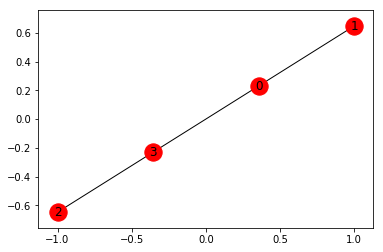

In [98]:
node_max = 3
g.clear()
for i in range(6):
    x = random.randint(0,node_max)
    y = random.randint(0,node_max)
    g.add_edge(x, y)
nx.draw_networkx(g)

In [99]:
g_dic = {}
node_set = set()
for i, j in g.edges():
    node_set.add(i)
    node_set.add(j)
    if i == j: continue
    if i not in g_dic : g_dic[i] = set()
    g_dic[i].add(j)

In [100]:
g.edges()

EdgeView([(3, 2), (3, 0), (3, 3), (0, 0), (0, 1)])

In [101]:
g_dic

{0: {1}, 3: {0, 2}}

In [102]:
node_set

{0, 1, 2, 3}

In [103]:
len(g.edges())

5

In [104]:
node_mat = np.zeros((len(node_set), len(node_set)))
for i in g_dic:
    p = 1/len(g_dic[i])
    for j in g_dic[i]:
        node_mat[j][i] = p
node_mat

array([[0. , 0. , 0. , 0.5],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. ]])

In [109]:
d = 0.85
pr = np.ones((len(node_set), 1)) 
for i in range(10):
    print(pr.T)
    pr = 1/len(node_set) * (1-d) + d * np.dot(node_mat,pr)
print('\n',pr.T)

[[1. 1. 1. 1.]]
[[0.4625 0.8875 0.4625 0.0375]]
[[0.0534375 0.430625  0.0534375 0.0375   ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]
[[0.0534375  0.08292188 0.0534375  0.0375    ]]

 [[0.0534375  0.08292188 0.0534375  0.0375    ]]
